In [2]:
import pandas as pd

articles = pd.read_csv('../data/articles.csv')

In [3]:
articles

,title,subtitle,corpus
0,Hospitals join Biden’s climate pledge; critics...,na,Dozens of the nation’s largest health care com...
1,Ship pollution is rising as the U.S. waits for...,Biden is pushing for countries to adopt a zero...,When the first American-made lake freighter bu...
2,We're Gonna Need a Greener Boat,na,Container ships transport just about everythin...
3,Prices Triple in Brazil's Lopsided Market for ...,Some call the program ‘inefficient.’ Others sa...,Something is amiss in Brazil’s biggest carbon ...
4,The U.S. is ditching coal. The Supreme Court r...,na,When conservative environmental lawyer Jeffrey...
5,Supreme Court limits EPA’s power to combat cli...,The decision risks putting the U.S. further of...,The Supreme Court on Thursday sharply cut back...
6,Russia’s chokehold over gas could send Europe ...,na,"BERLIN — Austria, Germany, Italy and the Nethe..."


In [4]:
import re

articles['corpus'] = articles['corpus'].map(lambda x: re.sub('[,\.!?]', '', x))

articles['corpus'] = articles['corpus'].map(lambda x: x.lower())

articles['subtitle'] = articles['subtitle'].map(lambda x: re.sub('[,\.!?]', '', x))

articles['subtitle'] = articles['subtitle'].map(lambda x: x.lower())

articles['title'] = articles['title'].map(lambda x: re.sub('[,\.!?]', '', x))

articles['title'] = articles['title'].map(lambda x: x.lower())

In [5]:
articles = articles.replace({'na': pd.NA})

In [6]:
articles

,title,subtitle,corpus
0,hospitals join biden’s climate pledge; critics...,<NA>,dozens of the nation’s largest health care com...
1,ship pollution is rising as the us waits for w...,biden is pushing for countries to adopt a zero...,when the first american-made lake freighter bu...
2,we're gonna need a greener boat,<NA>,container ships transport just about everythin...
3,prices triple in brazil's lopsided market for ...,some call the program ‘inefficient’ others say...,something is amiss in brazil’s biggest carbon ...
4,the us is ditching coal the supreme court ruli...,<NA>,when conservative environmental lawyer jeffrey...
5,supreme court limits epa’s power to combat cli...,the decision risks putting the us further off ...,the supreme court on thursday sharply cut back...
6,russia’s chokehold over gas could send europe ...,<NA>,berlin — austria germany italy and the netherl...


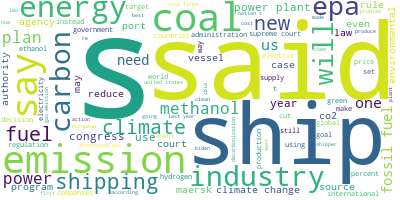

In [8]:
from wordcloud import WordCloud

longString = ','.join(list(articles['corpus']))

cloud = WordCloud(background_color = 'white', max_words = 100, contour_width = 3, contour_color = 'blue')

cloud.generate(longString)

cloud.to_image()

In [7]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\orect\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
stopWords = stopwords.words('english')
stopWords.extend(['from', 'subject', 're', 'edu', 'use'])

def sentToWords(sentences):
    for sentence in sentences:
        yield(simple_preprocess(str(sentence), deacc=True))

def removeStopWords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stopWords] for doc in texts]

data = articles.corpus.tolist()
dataWords = list(sentToWords(data))

dataWords = removeStopWords(dataWords)

In [9]:
import gensim.corpora as crp

id2word = crp.Dictionary(dataWords)

texts = dataWords

corpus = [id2word.doc2bow(text) for text in texts]

In [10]:
from pprint import pprint

numTopics = 10

ldaModel = gensim.models.LdaMulticore(corpus= corpus, id2word=id2word, num_topics=numTopics)

pprint(ldaModel.print_topics())
docLDA = ldaModel[corpus]

[(0,
  '0.009*"said" + 0.007*"coal" + 0.005*"carbon" + 0.005*"fuel" + 0.005*"ships" '
  '+ 0.005*"power" + 0.005*"epa" + 0.005*"emissions" + 0.005*"gas" + '
  '0.004*"energy"'),
 (1,
  '0.009*"said" + 0.009*"coal" + 0.008*"emissions" + 0.006*"climate" + '
  '0.006*"power" + 0.005*"energy" + 0.005*"carbon" + 0.005*"gas" + 0.005*"epa" '
  '+ 0.004*"ships"'),
 (2,
  '0.012*"coal" + 0.007*"said" + 0.007*"energy" + 0.007*"power" + 0.006*"gas" '
  '+ 0.006*"climate" + 0.004*"plants" + 0.004*"ships" + 0.004*"emissions" + '
  '0.004*"carbon"'),
 (3,
  '0.008*"methanol" + 0.007*"emissions" + 0.007*"shipping" + 0.007*"said" + '
  '0.006*"gas" + 0.006*"ships" + 0.006*"energy" + 0.006*"climate" + '
  '0.006*"power" + 0.006*"coal"'),
 (4,
  '0.008*"coal" + 0.007*"said" + 0.007*"emissions" + 0.006*"climate" + '
  '0.006*"carbon" + 0.006*"ships" + 0.006*"energy" + 0.005*"shipping" + '
  '0.005*"methanol" + 0.005*"fuel"'),
 (5,
  '0.007*"methanol" + 0.007*"emissions" + 0.007*"coal" + 0.007*"said" + '


In [12]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis

import os

In [13]:
pyLDAvis.enable_notebook()

LDAvisFilepath = os.path.join('../LDA visualisation/ldavisPrepared_' + str(numTopics))

if True:
    LDAvisPrepared = pyLDAvis.gensim_models.prepare(ldaModel, corpus, id2word)
    with open(LDAvisFilepath, 'wb') as f:
        pickle.dump(LDAvisPrepared, f)

pyLDAvis.save_html(LDAvisPrepared, '../LDA visualisation/ldavisPrepared_' + str(numTopics))

LDAvisPrepared

c:\Users\orect\miniconda3\envs\twitter\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.011767  0.002855       1        1  30.150761
3      0.000442 -0.011627       2        1  29.300082
7     -0.008365  0.004333       3        1  20.415266
8      0.017045  0.006810       4        1  17.362839
1      0.004679  0.002125       5        1   2.495926
2      0.010905 -0.002181       6        1   0.228466
4      0.001562 -0.002698       7        1   0.011665
5     -0.003430 -0.006954       8        1   0.011665
9     -0.010091  0.004356       9        1   0.011665
0     -0.000979  0.002980      10        1   0.011665, topic_info=          Term       Freq      Total Category  logprob  loglift
87        said  56.000000  56.000000  Default  30.0000  30.0000
29   emissions  43.000000  43.000000  Default  29.0000  29.0000
853       coal  40.000000  40.000000  Default  28.0000  28.0000
12      carbon  38.000000  38.000000  Default  27.0000  27.0000
16     climate  38.000000  38.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
462   methanol   0.002285  30.834123  Topic10  -5.7244  -0.4538
124     agency   0.001725  16.940214  Topic10  -6.0055  -0.1361
14      change   0.001732  17.221606  Topic10  -6.0016  -0.1486
16     climate   0.002294  38.284980  Topic10  -5.7202  -0.6660
10       biden   0.001603  17.249555  Topic10  -6.0785  -0.2271

[748 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1578      1  0.271704  ability
1578      2  0.271704  ability
1578      3  0.271704  ability
1578      4  0.271704  ability
113       1  0.397646      act
...     ...       ...      ...
750       4  0.199340    years
754       1  0.245142     zero
754       2  0.245142     zero
754       3  0.245142     zero
754       4  0.122571     zero

[931 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 4, 8, 9, 2, 3, 5, 6, 10, 1])